In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
df_3 = pd.read_csv('/content/drive/MyDrive/dataset3.csv')
df_3.head()

,ID,Optm,Usef,Relx,Intp,Engs,Dealpr,Thcklr,Goodme,Clsep,Conf,Mkmind,Loved,Intthg,Cheer
0,1087360,5,3,2,1,3,5,4,1,5,2,5,3,5,1
1,1094049,2,3,3,2,3,1,2,1,5,1,2,5,4,2
2,1094067,4,3,4,4,4,4,4,3,4,4,4,4,3,4
3,1097484,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,1102259,5,4,3,5,2,3,4,4,4,4,3,5,5,5


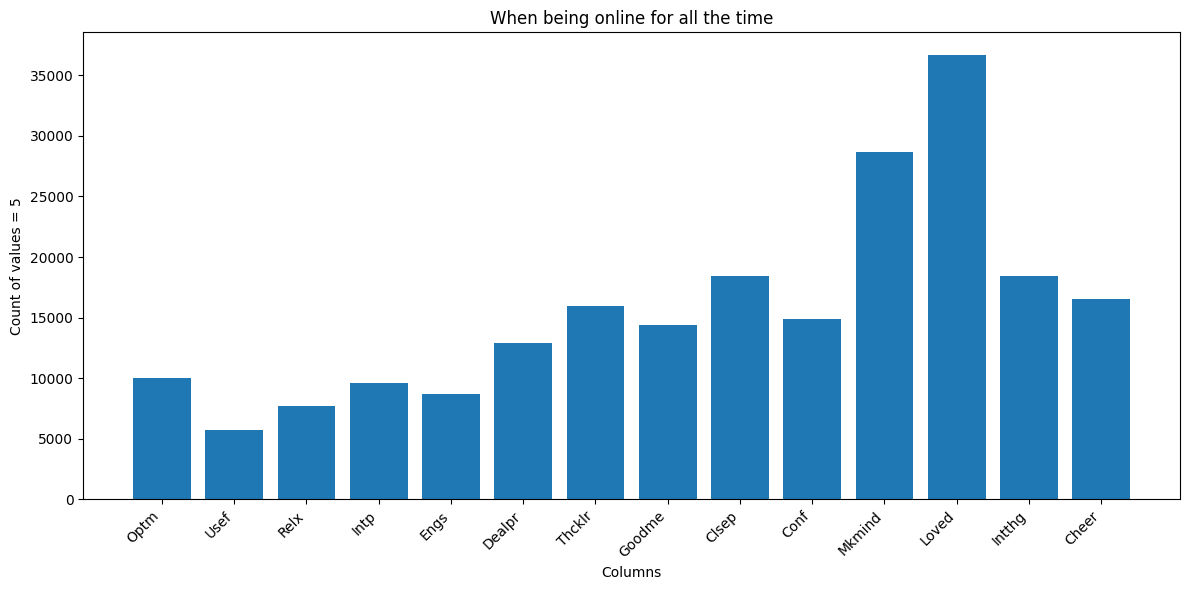

In [5]:


import matplotlib.pyplot as plt


df_5 = df_3[(df_3['Optm'] == 5) |
             (df_3['Usef'] == 5) |
             (df_3['Relx'] == 5) |
             (df_3['Intp'] == 5) |
             (df_3['Engs'] == 5) |
             (df_3['Dealpr'] == 5) |
             (df_3['Thcklr'] == 5) |
             (df_3['Goodme'] == 5) |
             (df_3['Clsep'] == 5) |
             (df_3['Conf'] == 5) |
             (df_3['Mkmind'] == 5) |
             (df_3['Loved'] == 5) |
             (df_3['Intthg'] == 5) |
             (df_3['Cheer'] == 5)]


column_counts = df_5[['Optm', 'Usef', 'Relx', 'Intp', 'Engs', 'Dealpr', 'Thcklr', 'Goodme', 'Clsep', 'Conf', 'Mkmind', 'Loved', 'Intthg', 'Cheer']].apply(lambda x: (x == 5).sum())


plt.figure(figsize=(12, 6))
plt.bar(column_counts.index, column_counts.values)
plt.xlabel('Columns')
plt.ylabel('Count of values = 5')
plt.title('When being online for all the time')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [6]:
print("Mean:\n", df_3.mean())
print("\nMedian:\n", df_3.median())
print("\nMode:\n", df_3.mode().iloc[0])
print("\nMax:\n", df_3.max())
print("\nMin:\n", df_3.min())

Mean:
 ID        1.059921e+06
Optm      3.276087e+00
Usef      3.107428e+00
Relx      3.097826e+00
Intp      3.272314e+00
Engs      3.048050e+00
Dealpr    3.369448e+00
Thcklr    3.488039e+00
Goodme    3.273250e+00
Clsep     3.557116e+00
Conf      3.308491e+00
Mkmind    3.851267e+00
Loved     3.897319e+00
Intthg    3.478748e+00
Cheer     3.496500e+00
dtype: float64

Median:
 ID        1059759.5
Optm            3.0
Usef            3.0
Relx            3.0
Intp            3.0
Engs            3.0
Dealpr          3.0
Thcklr          4.0
Goodme          3.0
Clsep           4.0
Conf            3.0
Mkmind          4.0
Loved           4.0
Intthg          4.0
Cheer           4.0
dtype: float64

Mode:
 ID        1000001.0
Optm            3.0
Usef            3.0
Relx            3.0
Intp            4.0
Engs            3.0
Dealpr          4.0
Thcklr          4.0
Goodme          4.0
Clsep           4.0
Conf            4.0
Mkmind          4.0
Loved           5.0
Intthg          4.0
Cheer           4.0


In [7]:


from scipy import stats


control_group = df_3['Loved']
experimental_group = df_5['Loved']


t_stat, p_value = stats.ttest_ind(control_group, experimental_group)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: -79.09475554566187
P-value: 0.0


In [10]:


import math


successes = len(df_3[df_3['Loved'] > 1])


total_observations = len(df_3)


sample_proportion = successes / total_observations


standard_error = math.sqrt((sample_proportion * (1 - sample_proportion)) / total_observations)


z_score = 1.96
margin_of_error = z_score * standard_error


ci_prop_lower = sample_proportion - margin_of_error
ci_prop_upper = sample_proportion + margin_of_error


mean_loved = df_3['Loved'].mean()


standard_error_mean = df_3['Loved'].std() / math.sqrt(total_observations)


margin_of_error_mean = z_score * standard_error_mean


ci_mean_lower = mean_loved - margin_of_error_mean
ci_mean_upper = mean_loved + margin_of_error_mean

print(f"CI Mean for Loved: [{ci_mean_lower:.4f}, {ci_mean_upper:.4f}]")
print(f"CI Prop for Loved (where > 1 is success): [{ci_prop_lower:.4f}, {ci_prop_upper:.4f}]")


CI Mean for Loved: [3.8908, 3.9039]
CI Prop for Loved (where > 1 is success): [0.9697, 0.9717]
